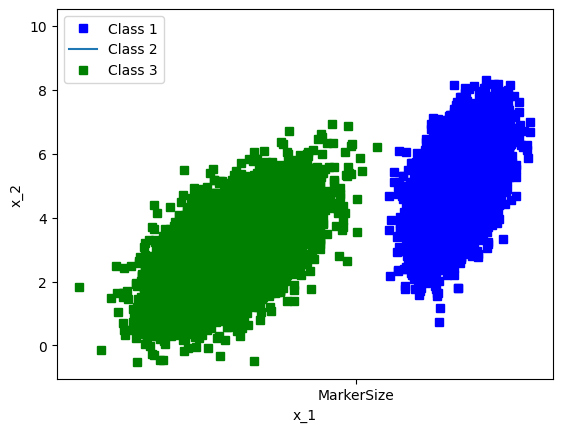

In [2]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt

# In the following we sample from Gaussian distribution to generate 3 clusters
L = 10000;

mu_1 = np.array([5, 5]); # mean 
Sigma_1 = np.array([[1, 0.5],[ 0.5, 1]]); # covariance
X_1 = np.random.multivariate_normal(mu_1,Sigma_1,L); # drawing samples from 2D Gaussian ditribution

mu_2 = np.array([-2, -4]);
Sigma_2 = np.array([[3, 0], [0, 1]]);
X_2 = np.random.multivariate_normal(mu_2,Sigma_2,L);

mu_3 = np.array([-6, 3]);
Sigma_3 = np.array([[3, 1], [1, 1]]);
X_3 = np.random.multivariate_normal(mu_3,Sigma_3,L);


#figure
plt.plot(X_1[:,0],X_1[:,1],'bs','MarkerSize',10)
plt.plot(X_3[:,0],X_3[:,1],'gs','MarkerSize',10)
#plt.plot(X_2[:,0],X_2[:,1],'rs','MarkerSize',10) 

plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend(['Class 1','Class 2', 'Class 3'])
plt.show

# Classification (2 classes)
C_1 = np.matlib.repmat([0,1],L,1); # generate labels for Class 1
C_2 = np.matlib.repmat([1,0],L,1); # generate labels for Class 2

C = np.concatenate((C_1,C_2))
X = np.concatenate((X_1,X_2))

# data set containing two classes
data_set = np.concatenate([X,C],1); # form the data set. Samples X_1 and X_2 belong to Class 1 and 2, respectivelly. 

rand_int = np.random.permutation(len(data_set)); # random vector generation
data_set = data_set[rand_int,:] # random shuffling of the data set.

# Data_set is a 20000x4 with
# x_1,x_2,c_1,c_2

The number of classification errors with logistic regression is: 0


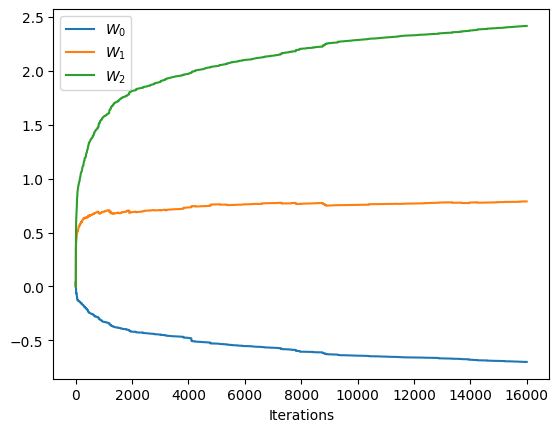

In [3]:
# My code!
percent_for_train = 0.8
amount = int(percent_for_train*len(data_set))

train_dataset = data_set[0:amount,:]
test_dataset = data_set[amount+1:,:]

W =  np.array([np.zeros(len(train_dataset)+1),np.zeros(len(train_dataset)+1),np.zeros(len(train_dataset)+1)]).T
t = train_dataset[:,2]
eta = 0.09
x = np.array([np.ones(len(train_dataset)),train_dataset[:,0],train_dataset[:,1]]).T

t_calc = np.zeros(len(t))
for k in range(len(t)):
    p_C1 = 1/(1 + np.exp(W[k]@x[k].T))
    if p_C1 > 1-p_C1:
        t_calc[k]=1
    else:
        t_calc[k] = 0 
    e = (p_C1-t[k])*x[k]
    W[k+1] = W[k] + eta*e


plt.plot(W)
plt.xlabel('Iterations')
plt.legend(['$W_{0}$','$W_{1}$','$W_{2}$'])


x_test = np.array([np.ones(len(test_dataset)),test_dataset[:,0],test_dataset[:,1]]).T

classification_errors = 0
for i, classification in enumerate(t):
    if t_calc[i] == classification:
        # Succes!
        continue
    else:
        classification_errors = classification_errors + 1    

print(f'The number of classification errors with logistic regression is: {classification_errors}')


The number of classification errors with logistic regression is: 0


Text(0.5, 0, 'iterations')

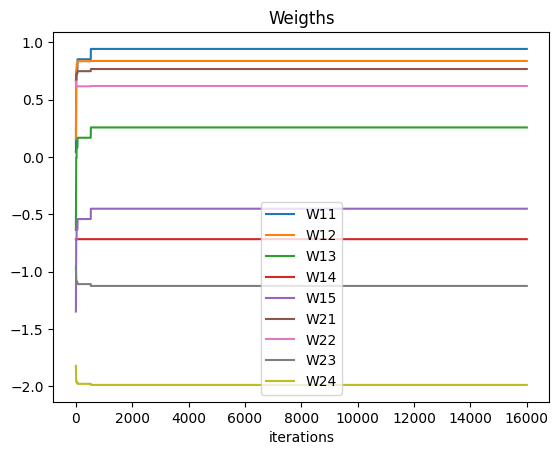

In [4]:
def expit(x):
    return 1/(1 + np.exp(x))

def der_sigmoid(x):
    return expit(x) * (1-expit(x))

from scipy.special import expit, logit

def der_sigmoid(x):
    return expit(-x) * (1-expit(-x))

sigma = 1

percent_for_train = 0.8
amount = int(percent_for_train*len(data_set))

train_dataset = data_set[0:amount,:]
test_dataset = data_set[amount+1:,:]


eta = 0.09
x = np.array([np.ones(len(train_dataset)),train_dataset[:,0],train_dataset[:,1]]).T

W_ji= np.random.normal(0,sigma,(4,3))
W_kj = np.random.normal(0,sigma,(1,5))
#x = np.column_stack([np.ones(50),np.linspace(-1,1,50)])
t = train_dataset[:,2]
W1 = []
W2 = []
for i in range(len(x)):
    W1.append(W_kj)
    W2.append(W_ji)
    x_i = x[i].reshape((1,3))

    aj = (W_ji @ x_i[0])
    zj = np.hstack((1,expit(-aj)))

    yk = W_kj@zj
    if yk > 1-yk:
        t_calc=1
    else:
        t_calc = 0 
    dk = t_calc - t[i]
    dj = (der_sigmoid(zj)*W_kj*dk.T)[:,1:]   

    W_ji = W_ji - eta*dj.T@x_i
    W_kj = W_kj - eta*dk*zj

x = np.array([np.ones(len(test_dataset)),test_dataset[:,0],test_dataset[:,1]]).T
aj = (W_ji @x.T)
zj = np.vstack([np.ones(len(aj[0])),(1/(1 + np.exp(aj)))])
yk = W_kj@zj
yk = yk[0]
t_test = []
for i,input in enumerate(yk):
    if yk[i] > 1-yk[i]:
        t_test.append(1)
    else:
        t_test.append(0)  

classification_errors = 0
t = test_dataset[:,2]
for i, classification in enumerate(t):
    if t_test[i] == classification:
        # Succes!
        continue
    else:
        classification_errors = classification_errors + 1    

print(f'The number of classification errors with logistic regression is: {classification_errors}')
W1 = np.array(W1)
W2 = np.array(W2)
W1 = W1[:,0,:]
W2 = W2[:,:,0]
plt.plot(W1)
plt.plot(W2)
plt.title('Weigths')
plt.legend(['W11','W12','W13','W14','W15','W21','W22','W23','W24'],loc=8)
plt.xlabel('iterations')

Vi laver bare en t for hver af dem så vi får 2 vægte for hvert t og så bare laver y_pred 4 gange

BRUG SOFTMAX

IMPORT SIGMOID FRA SCIPY

BRUG TANH til activation

Plotting t from test-data and the predicted t from the neural network together with x_1 in the x-axis

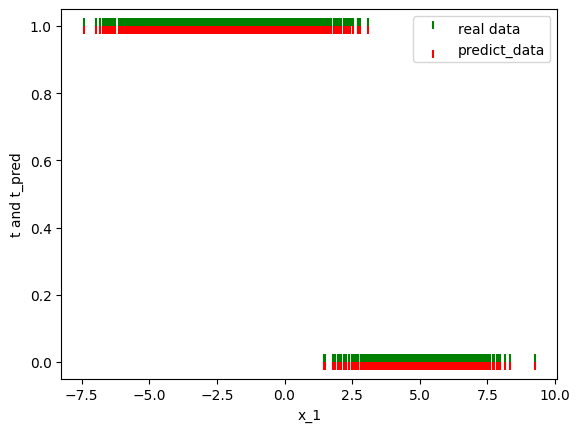

In [55]:
plt.scatter(test_dataset[:,0],t,color='g',marker=2)
plt.scatter(test_dataset[:,0],t_test,color='red',marker=3)
plt.ylabel('t and t_pred')
plt.xlabel('x_1')
plt.legend(['real data','predict_data'])

Look at 6.5.4 in "Deep learning" book

The number of classification errors with logistic regression is: 1


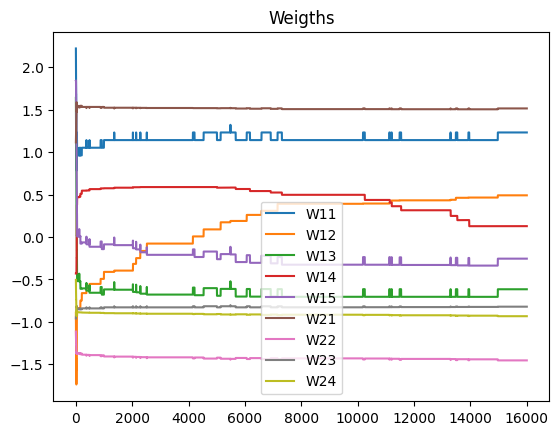

In [56]:
def expit(x):
    return 1/(1 + np.exp(x))

def der_sigmoid(x):
    return expit(x) * (1-expit(x))

sigma = 1

percent_for_train = 0.8
amount = int(percent_for_train*len(data_set))

train_dataset = data_set[0:amount,:]
test_dataset = data_set[amount+1:,:]


eta = 0.09
x = np.array([np.ones(len(train_dataset)),train_dataset[:,0],train_dataset[:,1]]).T

W_ji= np.random.normal(0,sigma,(4,3))
W_kj = np.random.normal(0,sigma,(1,5))
#x = np.column_stack([np.ones(50),np.linspace(-1,1,50)])
t = train_dataset[:,2]
W1 = []
W2 = []
for i in range(len(x)):
    W1.append(W_kj)
    W2.append(W_ji)
    x_i = x[i].reshape((1,3))

    aj = (W_ji @ x_i[0])
    zj = np.hstack((1,1/(1 + np.exp(aj))))

    yk = W_kj@zj
    if yk > 1-yk:
        t_calc=1
    else:
        t_calc = 0 
    dk = t_calc - t[i]
    dj = (der_sigmoid(zj)*W_kj*dk.T)[:,1:]   

    W_ji = W_ji - eta*dj.T@x_i
    W_kj = W_kj - eta*dk*zj

x = np.array([np.ones(len(test_dataset)),test_dataset[:,0],test_dataset[:,1]]).T
aj = (W_ji @x.T)
zj = np.vstack([np.ones(len(aj[0])),(1/(1 + np.exp(aj)))])
yk = W_kj@zj
yk = yk[0]
t_test = []
for i,input in enumerate(yk):
    if yk[i] > 1-yk[i]:
        t_test.append(1)
    else:
        t_test.append(0)  

classification_errors = 0
t = test_dataset[:,2]
for i, classification in enumerate(t):
    if t_test[i] == classification:
        # Succes!
        continue
    else:
        classification_errors = classification_errors + 1    

print(f'The number of classification errors with logistic regression is: {classification_errors}')
W1 = np.array(W1)
W2 = np.array(W2)
W1 = W1[:,0,:]
W2 = W2[:,:,0]
plt.plot(W1)
plt.plot(W2)
plt.title('Weigths')
plt.legend(['W11','W12','W13','W14','W15','W21','W22','W23','W24'],loc=8)

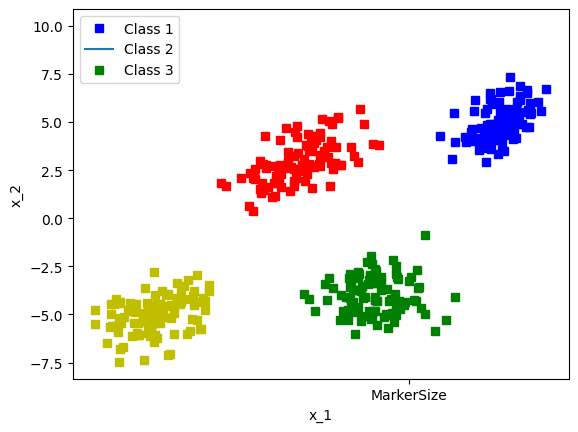

In [18]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from scipy.special import expit, logit

# In the following we sample from Gaussian distribution to generate 3 clusters
L = 100;

mu_1 = np.array([5, 5]); # mean 
Sigma_1 = np.array([[1, 0.5],[ 0.5, 1]]); # covariance
X_1 = np.random.multivariate_normal(mu_1,Sigma_1,L); # drawing samples from 2D Gaussian ditribution

mu_2 = np.array([-2, -4]);
Sigma_2 = np.array([[3, 0], [0, 1]]);
X_2 = np.random.multivariate_normal(mu_2,Sigma_2,L);

mu_3 = np.array([-6, 3]);
Sigma_3 = np.array([[3, 1], [1, 1]]);
X_3 = np.random.multivariate_normal(mu_3,Sigma_3,L);

mu_4 = np.array([-14, -5]);
Sigma_4 = np.array([[2, 0.5], [0.5, 1]]);
X_4 = np.random.multivariate_normal(mu_4,Sigma_4,L);

#figure
plt.plot(X_1[:,0],X_1[:,1],'bs','MarkerSize',10)
plt.plot(X_2[:,0],X_2[:,1],'gs','MarkerSize',10)
plt.plot(X_3[:,0],X_3[:,1],'rs','MarkerSize',10) 
plt.plot(X_4[:,0],X_4[:,1],'ys','MarkerSize',10) 

plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend(['Class 1','Class 2', 'Class 3'])
plt.show


# Classification (2 classes)
C_1 = np.matlib.repmat([0,0,0,1],L,1); # generate labels for Class 1
C_2 = np.matlib.repmat([0,0,1,0],L,1); # generate labels for Class 2
C_3 = np.matlib.repmat([0,1,0,0],L,1);
C_4 = np.matlib.repmat([1,0,0,0],L,1);

C = np.concatenate((C_1,C_2,C_3,C_4))
X = np.concatenate((X_1,X_2,X_3,X_4))

# data set containing two classes
data_set = np.concatenate([X,C],1); # form the data set. Samples X_1 and X_2 belong to Class 1 and 2, respectivelly. 
#data_set = np.concatenate([data_set,C2],1);


rand_int = np.random.permutation(len(data_set)); # random vector generation
data_set = data_set[rand_int,:] # random shuffling of the data set.

# Data_set is a 20000x4 with
# x_1,x_2,c_1,c_2

In [20]:
def func(t):
    x = np.array([np.ones(len(t)),test_dataset[:,0],test_dataset[:,1]]).T

    W_ji= np.random.normal(0,sigma,(4,3))
    W_kj = np.random.normal(0,sigma,(1,5))
    #x = np.column_stack([np.ones(50),np.linspace(-1,1,50)])
    #W1 = []
    #W2 = []
    dk = 0
    for _ in range(10000):
        for i in range(len(x)):
            #W1.append(W_kj)
            #W2.append(W_ji)
            x_i = x[i].reshape((1,3))

            aj = (W_ji @ x_i[0])
            zj = np.hstack((1,expit(-aj)))

            yk = W_kj@zj
            if yk > 1-yk:
                t_calc=1
            else:
                t_calc = 0 
            dk = t_calc - t[i]

            dj = (der_sigmoid(zj)*W_kj*dk.T)[:,1:]   

            W_ji = W_ji - eta*dj.T@x_i
            W_kj = W_kj - eta*dk*zj
    print(dk)
    return W_ji,W_kj




In [21]:
def make_func(W_ji,W_kj):
    x = np.array([np.ones(len(test_dataset)),test_dataset[:,0],test_dataset[:,1]]).T
    aj = (W_ji @x.T)
    zj = np.vstack([np.ones(len(aj[0])),expit(-aj)])
    yk = W_kj@zj
    yk = yk[0]
    t_test = []
    for i,input in enumerate(yk):
        if yk[i] > 1-yk[i]:
            t_test.append(1)
        else:
            t_test.append(0) 
    return t_test



In [22]:

def der_sigmoid(x):
    return expit(-x) * (1-expit(-x))

sigma = 1

percent_for_train = 0.8
amount = int(percent_for_train*len(data_set))

train_dataset = data_set[0:amount,:]
test_dataset = data_set[amount+1:,:]


eta = 0.09



In [23]:
W_ji1,W_kj1 = func(train_dataset[:,2])
W_ji2,W_kj2 = func(train_dataset[:,3])
W_ji3,W_kj3 = func(train_dataset[:,4])
W_ji4,W_kj4 = func(train_dataset[:,5])

C:\Users\Morten\AppData\Local\Temp\ipykernel_23536\1002926280.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array([np.ones(len(t)),test_dataset[:,0],test_dataset[:,1]]).T


ValueError: cannot reshape array of size 320 into shape (1,3)

In [24]:
W_ji1,W_kj1 = func(test_dataset[:,2])
W_ji2,W_kj2 = func(test_dataset[:,3])
W_ji3,W_kj3 = func(test_dataset[:,4])
W_ji4,W_kj4 = func(test_dataset[:,5])

0.0
0.0
0.0
0.0


In [25]:

t_test1 = make_func(W_ji1,W_kj1)
t_test2 = make_func(W_ji2,W_kj2)
t_test3 = make_func(W_ji3,W_kj3)
t_test4 = make_func(W_ji4,W_kj4)

classification_errors = 0
t = test_dataset[:,2:]
#t_pred = np.array([t_test1,t_test2,t_test3,t_test4])
t_pred = np.vstack((t_test1,t_test2,t_test3,t_test4)).T
for i, classification in enumerate(t):
    if np.argmax(np.array([t_test1[i],t_test2[i],t_test3[i],t_test4[i]])) == np.argmax(classification):
        # Succes!
        continue
    else:
        classification_errors = classification_errors + 1    



print(f'The number of classification errors is: {classification_errors} out of {len(t)}')

The number of classification errors is: 0 out of 79
